# 1 Inheritance
# 2 Функция issubclass(). Наследование от встроенных типов и от object
## Наследование от встроенных типов данных
# 3 Наследование. Функция super() и делегирование
## Функция super() и делегирование
# 4 Наследование. Атрибуты private и protected
## Атрибуты private и protected на уровне класса
# 5 Полиморфизм и абстрактные методы
## Абстрактные методы
# 6 Множественное наследование
Наследование/наследство

На этом занятии мы начнем изучение важной темы в ООП – наследование. Давайте предположим, что у нас в программе объявлены два независимых класса:

In [6]:
class Geom:
    name = 'Geom'
 
 
class Line:
    def draw(self):
        print("Рисование линии")

Как вы понимаете, если сейчас создать экземпляр класса Geom:

In [7]:
g = Geom()

то мы сможем обратиться к свойству name:

In [8]:
print(g.name)

Geom


но не сможем вызвать метод draw() класса Line, так как это совершенно другой, независимый класс. И то же самое для объекта Line. Можно вызвать его метод draw(), но нельзя обратиться к свойству name другого класса Geom:

In [9]:
l = Line()
l.draw()

Рисование линии


То есть, эти классы, пространства имен совершенно независимы между собой. Но, при необходимости, мы можем установить связь между ними и, например, сделать так, чтобы открытые атрибуты класса Geom были доступны в классе Line. Записывается такая связка, следующим образом:
```
class Line(Geom):
    def draw(self):
        print("Рисование линии")
```

В круглых скобках мы указали класс Geom, который собираемся расширять классом Line и все, что доступно в классе Geom автоматически становится доступным и в классе Line. В частности, мы теперь можем совершенно спокойно обратиться к свойству name через объект класса Line:

In [17]:
class Geom:
    name = 'Geom'

class Line(Geom):
    def draw(self):
        print("Рисование линии")

In [18]:
g = Geom()
l = Line()
print(l.name) # Через экземпляр класса Line образаемся к св-ву name.
# Про пространство имен.

Geom


Такая конструкция, когда один класс определяется на основе другого, называется **наследованием**. Причем, класс Geom называется **родительским** или **базовым**, а класс Line – **подклассом** родительского или **дочерним классом**.

Графически иерархию наследования классов принято изображать в виде прямоугольников, соединенных стрелками, причем стрелка направлена от дочернего к базовому классу:

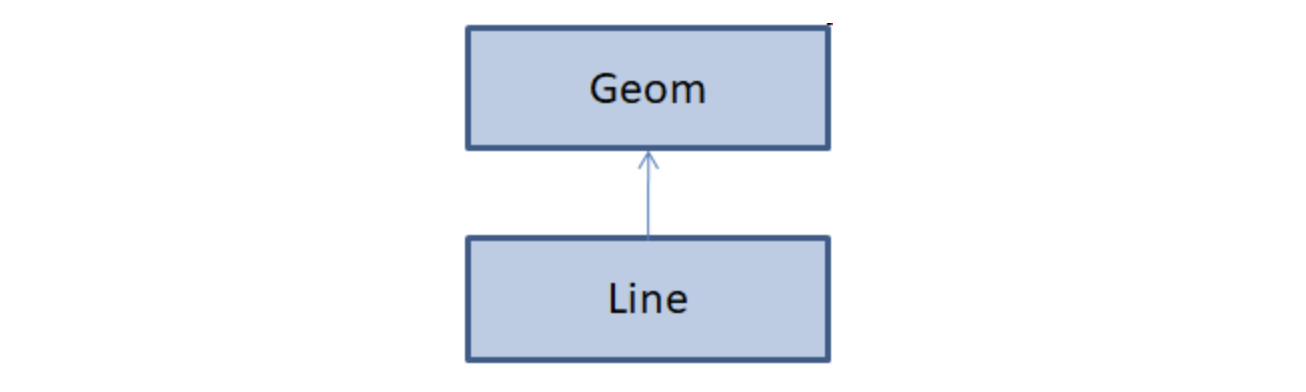

Для чего может понадобиться наследование? Давайте добавим в класс Line метод set_coords для записи координат в объект-линию:
```
def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
```

А, затем, определим еще один подобный класс для прямоугольников.

In [19]:
class Geom:
    name = 'Geom'

class Line(Geom):
    def draw(self):
        print("Рисование линии")

    def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

class Rect(Geom):
    def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
 
    def draw(self):
        print("Рисование прямоугольника")

g = Geom()
l = Line()
print(l.name) # Через экземпляр класса Line образаемся к св-ву name

Geom


Как видите, у нас здесь налицо дублирование кода. И оно будет быстро нарастать с увеличением классов для различных геометрических фигур. Чтобы этого не было, мы можем общее для всех дочерних классов (от Geom) вынести в базовый и, в частности, записать в нем метод set_coords. В итоге получим, следующие определения классов:

In [2]:
class Geom:
    name = 'Geom'
 
    def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
 
 
class Line(Geom):
    def draw(self):
        print("Рисование линии")
 
 
class Rect(Geom):
    def draw(self):
        print("Рисование прямоугольника")


В результате мы устранили дублирование кода и можем вызывать метод set_coords из базового класса через объекты дочерних классов:

In [24]:
l = Line()
r = Rect()
l.set_coords(1, 1, 2, 2)
r.set_coords(1, 1, 3, 3)
print(l.__dict__)
print(r.__dict__)

{'x1': 1, 'y1': 1, 'x2': 2, 'y2': 2}
{'x1': 1, 'y1': 1, 'x2': 3, 'y2': 3}


А иерархия наследования принимает вид:

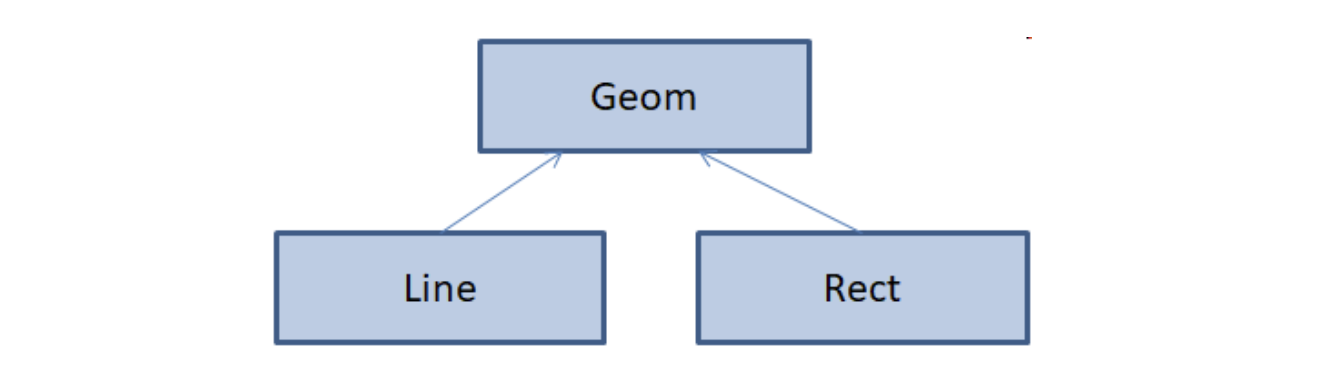

Давайте теперь внимательнее посмотрим, как отрабатывает метод set_coords базового класса Geom. Во-первых, когда происходит его вызов, например, через объект класса Line:

In [29]:
l.set_coords(1, 1, 2, 2)

то метод с таким названием сначала ищется в классе Line и если не находится, то поиск продолжается в базовых классах. В данном случае – это класс Geom. В нем этот метод обнаруживается и запускается.

Во-вторых, при вызове метода set_coords() из базового класса его параметр self будет ссылаться на объект, через который этот метод был вызван. То есть, на объект класса Line. Вот это очень важный момент! Параметр self в базовых классах может ссылаться не только на объекты этого же класса, но и на объекты производных (дочерних) от него классов, как в нашем случае – на объект класса Line.

Почему это важно? Смотрите, формально сейчас мы можем в методе set_coords() вызвать метод дочернего класса draw():
```
def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.draw()
```

И после запуска программы увидим, что сначала была нарисована линия, а затем, прямоугольник. Потому что сначала вызывался метод set_coords() через объект класса Line, а потом – через объект класса Rect. Но такой вызов метода draw() таит в себе потенциальную ошибку. Если мы создадим объект базового класса:
```
g = Geom()
```
а, затем, вызовем все тот же метод set_coords():
```
g.set_coords(0, 0, 0, 0)
```

то при выполнении программы получим ошибку, что метод draw() не определен. Действительно, теперь параметр self метода set_coords() ссылается на объект базового класса Geom, а в нем метод draw отсутствует. Отсюда и получается такая ошибка. Поэтому, при реализации методов в классах следует придерживаться одного простого правила: внутри них обращаться только к разрешенным атрибутам либо внутри текущего класса, либо базовых классов. Но не дочерних.

Я уберу вызов метода draw() в методе set_coords() и теперь никаких ошибок у нас не возникает.

Похожим образом происходит и обращение к свойствам базовых классов. Сейчас в классе Geom прописано свойство name и, как мы видели, к нему можно совершенно спокойно обращаться из объектов дочерних классов:
```
print(l.name)
print(r.name)
```

То есть, если указанное свойство не находится в соответствующем дочернем классе, то поиск продолжается в базовых. Однако, если свойство name прописать непосредственно в дочернем классе, например, Line:
```
class Line(Geom):
    name = 'Line'
 
    def draw(self):
        print("Рисование линии")
```

то для объектов-линий оно будет взято непосредственно из класса Line, а для прямоугольников, по-прежнему, из базового класса Geom.

Кстати, когда мы определяем какой-либо существующий атрибут в дочернем классе – это называется **переопределением**. То есть, мы переопределили атрибут name, который присутствует в базовом классе Geom и интегрированная среда нам об этом сигнализирует стрелочкой вверх. 
То же самое происходит и при переопределении методов. Давайте добавим в класс Geom метод draw():
```
def draw(self):
        print("Рисование примитива")
```
и видим, что у этого метода в базовом классе нарисована стрелочка вниз, а в дочерних – стрелочка вверх. Это и есть обозначения переопределения методов.
Работают они очевидным образом. Если draw() вызвать из дочерних объектов:
```
l.draw()
r.draw()
```

то будут вызваны соответствующие методы дочерних классов. А если мы вызываем draw() из базового класса:
```
g = Geom()
g.draw()
```

то будет вызван метод базового класса. Разумеется, если в каком-либо дочернем классе убрать метод draw(), например, в прямоугольнике, то для него будет вызван метод уже базового класса.

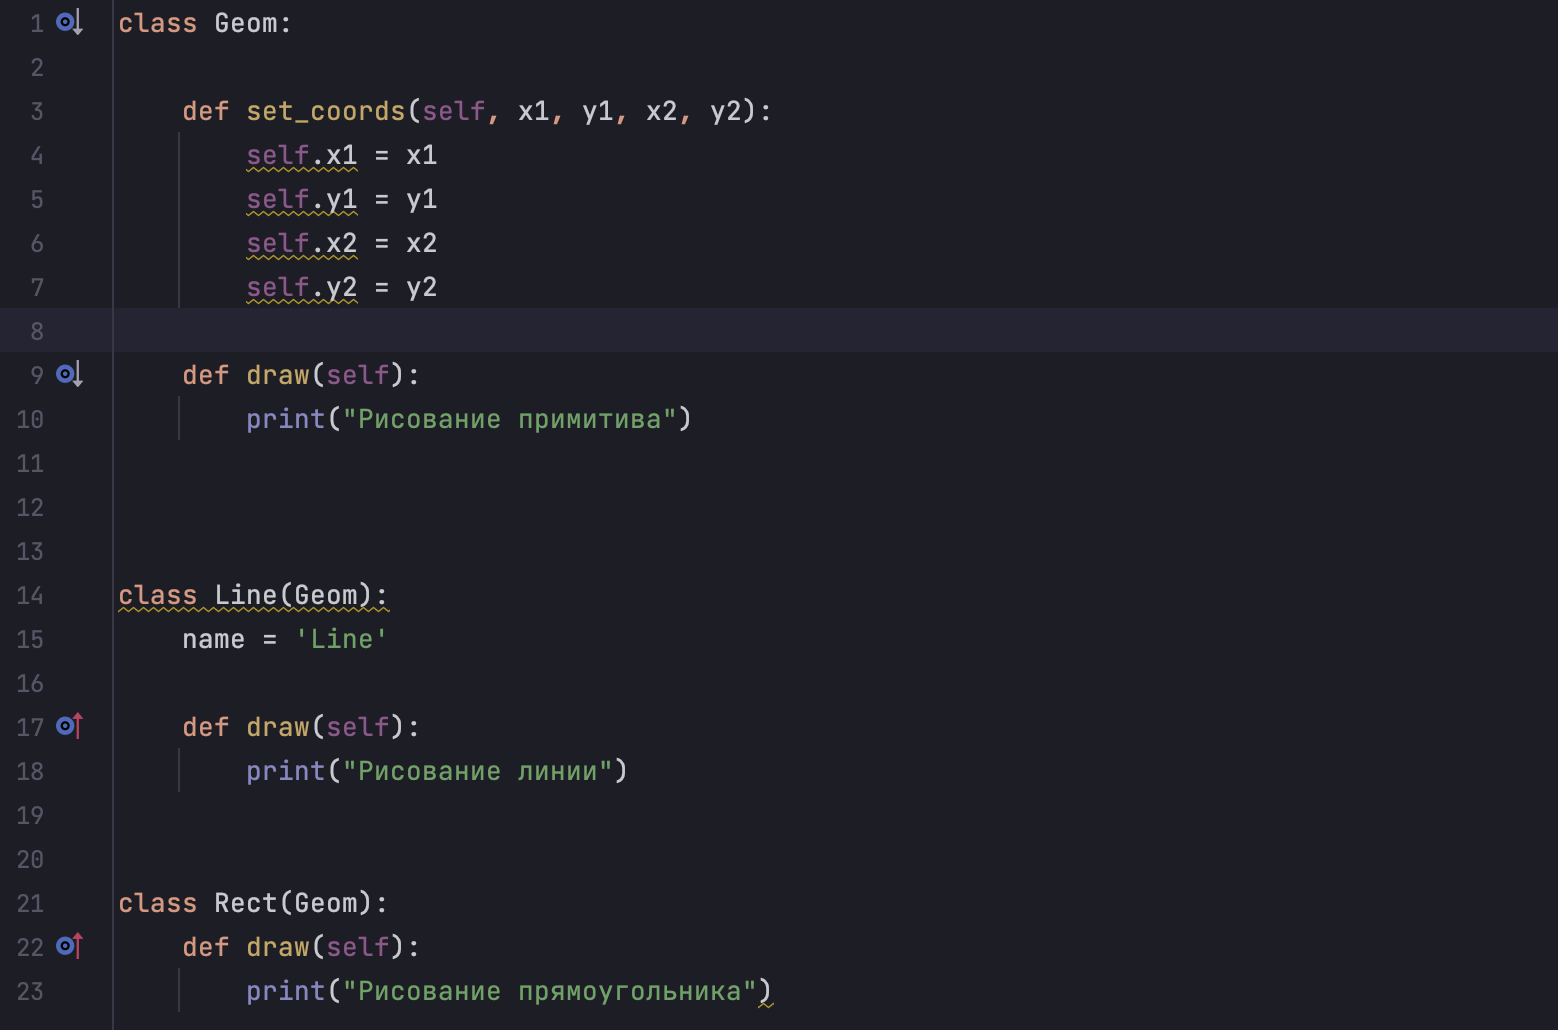

## Useful links:
https://www.jetbrains.com/help/pycharm/viewing-structure-and-hierarchy-of-the-source-code.html

https://www.jetbrains.com/help/pycharm/symbols.html


# 2 Функция issubclass(). Наследование от встроенных типов и от object

Вначале нашего курса по ООП мы говорили, что пользовательский класс по умолчанию автоматически наследуется от базового класса object языка Python. Например, если записать некий класс Geom без какой-либо реализации:

In [1]:
class Geom:
    a='12345'
    pass

то, смотрите, в среде PyCharm записав ниже «Geom.» мы увидим список различных методов и свойств. Например, можно вывести значение свойства ```__class__```:

In [2]:
print(Geom.__class__)

<class 'type'>


Откуда все это взялось? Как мы уже знаем, от базового класса object, который неявно добавляется, начиная с версии языка Python 3. Это эквивалентно такой записи:
```
class Geom(object):
    pass
```
И все эти атрибуты находятся в классе object.

Зачем это было сделано? Очевидно, чтобы обеспечить стандартный базовый функционал работы с классами. В частности, когда мы создаем экземпляр класса:
```
g = Geom()
```
а, затем, выводим его с помощью функции print:
```
print(g)
```

то автоматически отрабатывает магический метод __str__, который определен в базовом классе object. И так со всеми атрибутами, ничего лишнего там нет. Как вы понимаете, иметь такой базовый функционал очень удобно, поэтому в Python происходит такое наследование по умолчанию от object. В результате, мы имеем иерархию наследования:

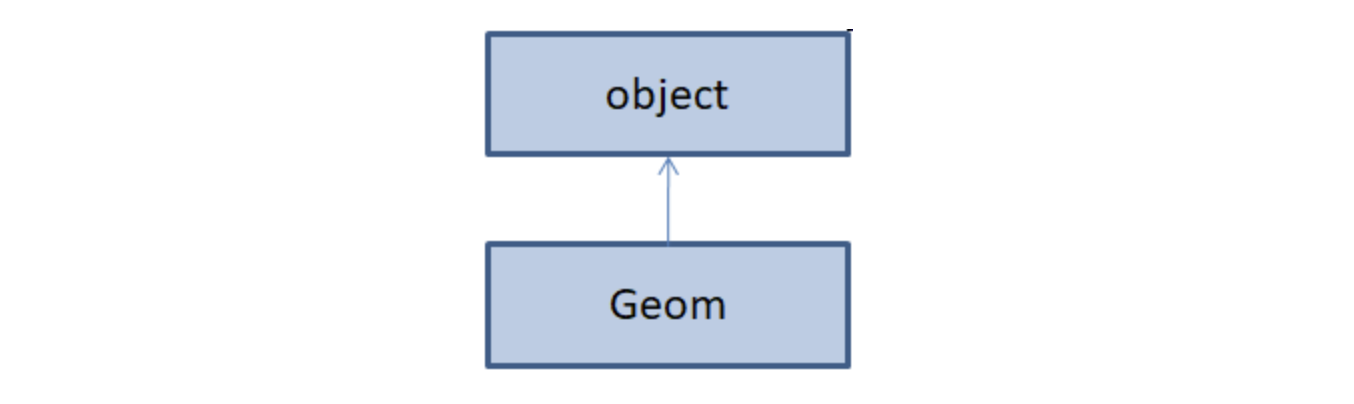

Однако, если добавить дочерний класс от Geom, например, класс Line для представления линии:
```
class Geom(object):
    pass
 
 
class Line(Geom):
    pass
```

то иерархия наследования уже будет такой:

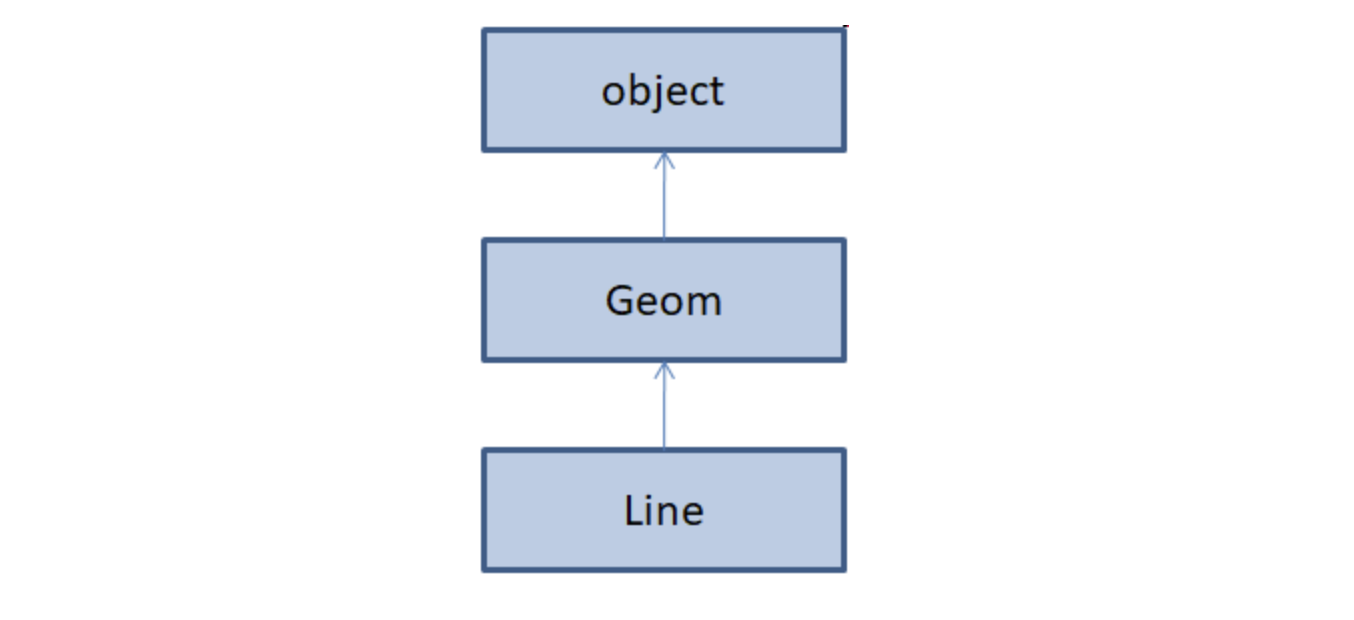

То есть, указывая в качестве базового любой другой класс, непосредственное наследование от object уже не происходит, только косвенное – через базовые классы. Разумеется, здесь объекты Line также имеют полный доступ ко всем открытым атрибутам класса object:

In [41]:
class Geom(object):
    pass
 
 
class Line(Geom):
    pass

l = Line()
print(l.__class__)

<class '__main__.Line'>


Мало того, мы можем определять, является ли тот или иной класс подклассом другого класса. Это делает функция issubclass()
```
issubclass(cls, class_or_tuple, /)
    Return whether 'cls' is derived from another class or is the same class.
    
    Возвращает, является ли 'cls' производным от другого класса или это один и тот же класс.
```

, например:

In [43]:
print(issubclass(Line, Geom))

True


Функция возвращает значение True, если класс Line является подклассом класса Geom. А вот если указать их в другом порядке:

In [ ]:
print(issubclass(Geom, Line))

то получим False, так как класс Geom не является дочерним от класса Line.

А вот с объектами классов эта функция не работает. Если записать:

In [44]:
print(issubclass(l, Geom))

TypeError: issubclass() arg 1 must be a class

то получим ошибку, что аргумент должен быть классом, а не его экземпляром. Если нам все же нужно проверить принадлежность объекта тому или иному классу, в том числе и базовому, то следует использовать уже знакомую нам функцию isinstance().

```
isinstance(obj, class_or_tuple, /)
    Return whether an object is an instance of a class or of a subclass thereof.

    Возвращает, является ли объект экземпляром класса или его подклассом.
```

In [45]:
print(isinstance(l, Geom))
print(isinstance(l, Line))

True
True


В обоих случаях получим значение True. Также истину вернет и проверка на базовый класс object:

In [46]:
print(isinstance(l, object))

True


Это еще раз показывает, что все классы неявно наследуются от object.

## Наследование от встроенных типов данных

Мы также уже знаем, что все стандартные типы данных (int, float, list, dict and others) являются классами.

Мы в этом легко можем убедиться, если выполним для них функцию issubclass():

In [48]:
print(issubclass(int, object))
issubclass(list, object)

True


True

В обоих случаях увидим True. А мы знаем, что эта функция работает исключительно с классами, а не объектами, поэтому данный факт подтверждает, что эти типы являются классами языка Python.

Также, если обратимся к документации:
```
class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
```

mutable - изменяемый.  imutable - неизменяемый

Раз это так, то что нам мешает наследоваться от них и расширять функционал по мере необходимости? Ничего, поэтому можно сделать, например, такую реализацию:

Напоминание: __str__() – магический метод для отображения информации об объекте класса для пользователей (например, для функций print, str);

In [7]:
class Vector(list):
    def __str__(self):
        return " ".join(map(str, self))
 
 
v = Vector([1, 2, 3])
print(v)
l = list([1,2,3])
print(l)

1 2 3
[1, 2, 3]


Мы здесь переопределили магический метод __str__ для вывода списка в виде набора данных через пробел. Мало того, теперь тип данных нашего списка стал не list, а Vector:

In [6]:
print(type(v))

<class '__main__.Vector'>


Конечно, стандартные типы данных редко расширяют с помощью пользовательских классов, но понимать, что они представляют собой классы и что такая возможность в принципе существует, важно.

Итак, из этого занятия вы должны были узнать, что все классы по умолчанию наследуются от базового класса object, как работает функция issubclass() и что из себя представляют встроенные типы данных языка Python.

# 3 Наследование. Функция super() и делегирование

Начнем с терменологии. Если у нас имеется некий базовый класс Geom и мы создаем дочерний класс Line, в котором дополнительно прописан метод draw(), то это называется **расширением** (extend) базового класса:
```
extending:

class Geom:
    name = 'Geom'
 
 
class Line(Geom):
    def draw(self):
        print("Рисование линии")
```

Как правило, дочерние создаются именно для расширения функциональности базовых классов. Однако, если в классе Geom также прописать метод draw():

In [54]:
# overriding:

class Geom:
    name = 'Geom'

    def draw(self):
        print("Рисование примитива")
 
 
class Line(Geom):
    def draw(self):
        print("Рисование линии")

то теперь класс Line лишь переопределяет (overriding) поведение базового класса, не меняя его принцип функционирования. Поэтому, когда говорят о расширении, то подразумевают добавление новых атрибутов в дочерних классах, а при переопределении (обычно методов) – изменение поведения уже существующего функционала.

## Функция super() и делегирование


Если линка, значит открываем сперва ее.
https://tirinox.ru/super-python/


Давайте теперь пропишем инициализатор в базовом классе Geom (метод draw уберем), а ниже создадим экземпляр класса Line:

In [56]:
class Geom:
    name = 'Geom'

    def __init__(self):
        print("инициализатор Geom")
 
 
class Line(Geom):
    def draw(self):
        print("Рисование линии")

l = Line()

инициализатор Geom


После запуска программы увидим ожидаемое поведение – был автоматически вызван инициализатор базового класса. В действительности, здесь происходит следующая последовательность вызовов магических методов. Сначала вызывается __call__(), который, в свою очередь, последовательно вызывает метод __new__() для создания экземпляра класса, а затем, метод __init__() для его инициализации. Так вот, все эти методы вызываются из дочернего класса Line. Если какой-либо из них не находится, то поиск продолжается в родительских классах в порядке иерархии наследования. Например, метод __new__() в данном случае будет взят из метакласса type, который неявно вызывается при создании классов (Возможно, про это будем говорить. Но лезть так глубоко нет неободимости). А вот метод __init__() мы прописали в классе Geom, поэтому будет вызван именно он. Причем, параметр self в этом методе будет ссылаться на созданный объект класса Line. Об этом мы с вами уже говорили и это следует помнить. Параметр self в методах класса всегда ссылается на объект, из которого метод был вызван.

Отлично, я думаю в целом схема вызова методов в момент создания экземпляров классов, понятна. И в соответствии с ней, если мы определим инициализатор в классе Line, то именно он и должен вызваться. Давайте это сделаем:

In [57]:
class Geom:
    name = 'Geom'

    def __init__(self):
        print("инициализатор Geom")
 
 
class Line(Geom):
    def __init__(self):
        print("инициализатор Line")
 
    def draw(self):
        print("Рисование линии")

l = Line()

инициализатор Line


Запустим программу и теперь видим, что действительно, вызывается именно метод __init__ класса Line. Я перепишу его со следующими параметрами:
```
def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
```
Это координаты начала и конца линии на плоскости. Соответственно, при создании объектов этого класса, мы теперь должны передавать аргументы:
```
l = Line(0, 0, 10, 20)
```

In [60]:
class Geom:
    name = 'Geom'

    def __init__(self):
        print("инициализатор Geom")
 
 
class Line(Geom):
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
 
    def draw(self):
        print("Рисование линии")

l = Line(0, 0, 10, 20)
l.__dict__

{'x1': 0, 'y1': 0, 'x2': 10, 'y2': 20}

Все работает и никаких проблем у нас нет. Но, давайте теперь добавим еще один класс Rect для прямоугольников:
```
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill=None):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.fill = fill
 
    def draw(self):
        print("Рисование прямоугольника")
```

In [65]:
class Geom:
    name = 'Geom'

    def __init__(self):
        print("инициализатор Geom")
 
 
class Line(Geom):
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
 
    def draw(self):
        print("Рисование линии")

class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill=None):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.fill = fill
 
    def draw(self):
        print("Рисование прямоугольника")

l = Line(0, 0, 10, 20)
print(l.__dict__)

r = Rect(0, 0, 10, 20, 'ultramarine')
r.__dict__

{'x1': 0, 'y1': 0, 'x2': 10, 'y2': 20}


{'x1': 0, 'y1': 0, 'x2': 10, 'y2': 20, 'fill': 'ultramarine'}

Смотрите, у нас получилось дублирование кода. Это нехорошо. Но мы знаем, как это можно поправить. Давайте общее этих методов вынесем в базовый класс Geom. В дочернем классе Line уберем инициализатор, т.к. он полностью повторяется в Geom, а класс Rect также перепишем.

In [4]:
class Geom:
    name = 'Geom'

    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор Geom для {self.__class__}")
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    
    def draw(self):
        print("Рисование")
 
class Line(Geom):
    def draw(self):
        print("Рисование линии")

class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill=None):
        print("инициализатор Rect")
        self.fill = fill
 
    def draw(self):
        print("Рисование прямоугольника")

g = Geom(0,0,10,10)
g.draw()

l = Line(0, 0, 10, 20)
print(l.__dict__)
l.draw()

r = Rect(0, 0, 10, 20, 'ultramarine')
r.__dict__
r.draw()

инициализатор Geom для <class '__main__.Geom'>
Рисование
инициализатор Geom для <class '__main__.Line'>
{'x1': 0, 'y1': 0, 'x2': 10, 'y2': 20}
Рисование линии
инициализатор Rect
Рисование прямоугольника


После запуска увидим следующее:
```
инициализатор Geom для <class '__main__.Line'> 
инициализатор Rect
```
О чем это говорит? Для класса Line был вызван инициализатор в базовом классе Geom, а для класса Rect не вызывался – только инициализатор самого класса. И это логично, так как метод __init__() был найден в Rect и дальше цепочка поиска не продолжалась. 

Но нам же нужно при создании примитивов также вызывать инициализатор и базового класса Geom. Как это сделать? Конечно, мы могли бы явно указать имя базового класса Geom и вызвать через него магический метод __init__() в инициализаторе класса Rect:
```
def __init__(self, x1, y1, x2, y2, fill=None):
        Geom.__init__(self, x1, y1, x2, y2)
        print("инициализатор Rect")
        self.fill = fill
```

Но явно указывать имена базовых классов не лучшая практика, так как имена и иерархия наследования могут меняться. Поэтому в Python для обращения к базовому классу используется специальная функция super():
```
def __init__(self, x1, y1, x2, y2, fill=None):
        super().__init__(x1, y1, x2, y2)
        print("инициализатор Rect")
        self.fill = fill
```
Она возвращает ссылку на, так называемый, объект-посредник, через который происходит вызов методов базового класса.

In [70]:
class Geom:
    name = 'Geom'

    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор Geom для {self.__class__}")
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
 
 
class Line(Geom):
    def draw(self):
        print("Рисование линии")

class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill=None):
        super().__init__(x1, y1, x2, y2)
        print("инициализатор Rect")
        self.fill = fill
 
    def draw(self):
        print("Рисование прямоугольника")

l = Line(0, 0, 10, 20)
print(l.__dict__)

r = Rect(0, 0, 10, 20, 'ultramarine')
print(r.__dict__)

инициализатор Geom для <class '__main__.Line'>
{'x1': 0, 'y1': 0, 'x2': 10, 'y2': 20}
инициализатор Geom для <class '__main__.Rect'>
инициализатор Rect
{'x1': 0, 'y1': 0, 'x2': 10, 'y2': 20, 'fill': 'ultramarine'}


Теперь, при запуске программы мы видим, что был вызван инициализатор сначала класса Geom, а затем, для Rect. Такое обращение к переопределенным методам базового класса с помощью функции super() называется делегированием. То есть, мы делегировали вызов инициализатора класса Geom, чтобы он создал в нашем объекте локальные свойства с координатами углов прямоугольника. Причем, вызов метода __init__() базового класса лучше делать в первой же строчке, чтобы он случайно не переопределял какие-либо локальные свойство в дочернем классе. Например, если в базовом __init__() дополнительно прописать:
```
def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор Geom для {self.__class__}")
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.fill = 0
```
А в дочернем его вызвать в последнюю очередь:
```
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill=None):
        print("инициализатор Rect")
        self.fill = fill
        super().__init__(x1, y1, x2, y2) # <---
```
то, очевидно, свойство fill будет неявно переопределено при вызове __init__() базового класса и будет равно нулю.

Подобные причины и рекомендуют делать вызов инициализатора базового класса в первой же строчке:
```
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill=None):
        super().__init__(x1, y1, x2, y2) # <---
        print("инициализатор Rect")
        self.fill = fill <---
```
Теперь у нас нет проблем с определением локального свойства fill.

Мы узнали о понятиях расширения классов и переопределения их методов, разобрались с работой функции super(), а также делегированием методов, то есть их вызовом из базового класса через функцию super().


# 4 Наследование. Атрибуты private и protected

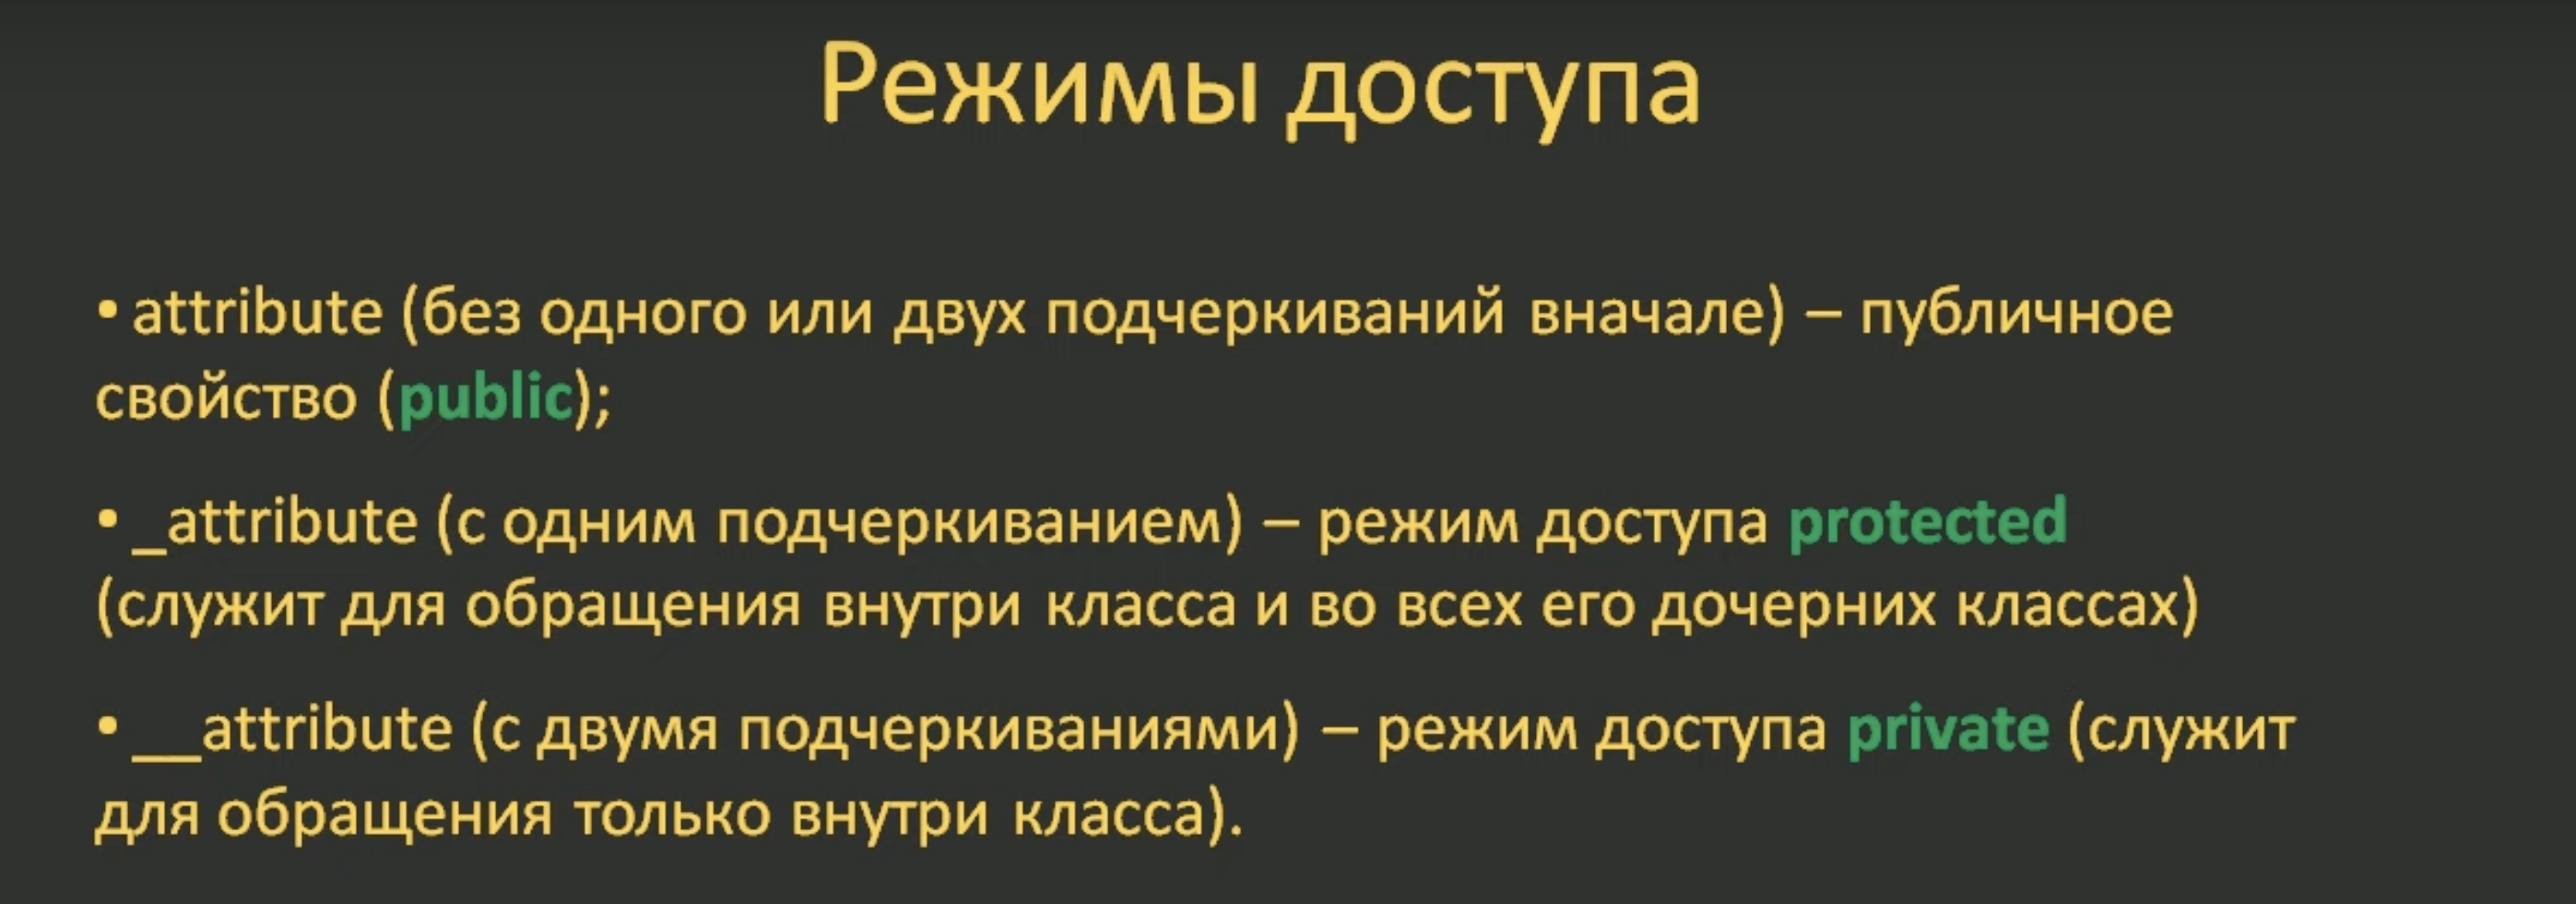

Давайте посмотрим, как ведут себя атрибуты с этими режимами доступа при наследовании. Возьмем пример из предыдущего занятия с двумя классами:

In [71]:
class Geom:
    name = 'Geom'
 
    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор Geom для {self.__class__}")
        self.__x1 = x1
        self.__y1 = y1
        self.__x2 = x2
        self.__y2 = y2
 
 
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill='red'):
        super().__init__(x1, y1, x2, y2)
        self.__fill = fill

Здесь мы пытаемся в инициализаторе базового класса Geom сформировать приватные локальные свойства с координатами прямоугольника. Дополнительно в инициализаторе самого класса создается приватное свойство __fill.

Ниже создадим объект класса Rect и выведем все его локальные атрибуты в консоль:

In [73]:
r = Rect(0, 0, 10, 20)
print(r.__dict__)

инициализатор Geom для <class '__main__.Rect'>
{'_Geom__x1': 0, '_Geom__y1': 0, '_Geom__x2': 10, '_Geom__y2': 20, '_Rect__fill': 'red'}


После запуска программы увидим следующие строчки:
```
инициализатор Geom для <class '__main__.Rect'> 
{'_Geom__x1': 0, '_Geom__y1': 0, '_Geom__x2': 10, '_Geom__y2': 20, '_Rect__fill': 'red'}
```
Локальные свойства с координатами имеют префикс _Geom, то есть, префикс того класса, в котором они непосредственно были прописаны. Несмотря на то, что параметр self является ссылкой на объект класса Rect. Это особенность поведения (формирования) приватных атрибутов в базовых классах. У них всегда добавляется префикс именно базового класса, а не класса объекта self. А вот последнее свойство __fill имеет ожидаемый префикс _Rect, так как оно было создано в классе Rect.

Что из этого следует? Во-первых, мы, конечно же, не можем обратиться в свойствам-координатам в дочернем классе Rect. Если в нем прописать метод get_coords():
```
def get_coords(self):
        return (self.__x1, self.__y1, self.__x2, self.__y2)
```
а, затем, вызвать через объект класса Rect:
```
r.get_coords()
```

In [77]:
class Geom:
    name = 'Geom'
 
    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор Geom для {self.__class__}")
        self.__x1 = x1
        self.__y1 = y1
        self.__x2 = x2
        self.__y2 = y2
 
 
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill='red'):
        super().__init__(x1, y1, x2, y2)
        self.__fill = fill

    def get_coords(self):
        return (self.__x1, self.__y1, self.__x2, self.__y2)
    

r = Rect(0, 0, 10, 20)
print(r.__dict__)
r.get_coords()

инициализатор Geom для <class '__main__.Rect'>
{'_Geom__x1': 0, '_Geom__y1': 0, '_Geom__x2': 10, '_Geom__y2': 20, '_Rect__fill': 'red'}


AttributeError: 'Rect' object has no attribute '_Rect__x1'

то увидим ошибку AttributeError. Но если перенести этот метод в базовый класс Geom, то все сработает без ошибок, так как приватным свойствам будет добавлен правильный префикс _Geom.

Возможно, вам кажется это немного запутанным? Но давайте вспомним, а для чего вообще нужны и когда используются приватные атрибуты. Мы говорили, что это закрытые от внешнего вмешательства свойства или методы текущего класса, доступные только внутри этого класса и недоступные из других, в том числе и из дочерних классов. Именно поэтому приватные атрибуты жестко привязываются к текущему классу, в котором они создаются, так как по логике предполагается их использовать только внутри этого класса и больше нигде.

Если же нам нужно определить закрытые атрибуты, доступные в текущем классе и во всех его дочерних классах, то для этого следует использовать метод определения protected – одно нижнее подчеркивание. Поэтому правильнее было бы создавать свойства-координаты в базовом инициализаторе в режиме protected, тогда никаких проблем с доступом уже не возникает:

In [78]:
class Geom:
    name = 'Geom'
 
    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор Geom для {self.__class__}")
        self._x1 = x1
        self._y1 = y1
        self._x2 = x2
        self._y2 = y2
 
 
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill='red'):
        super().__init__(x1, y1, x2, y2)
        self._fill = fill
 
    def get_coords(self):
        return (self._x1, self._y1, self._x2, self._y2)
    
r = Rect(0, 0, 10, 20)
print(r.__dict__)
r.get_coords()

инициализатор Geom для <class '__main__.Rect'>
{'_x1': 0, '_y1': 0, '_x2': 10, '_y2': 20, '_fill': 'red'}


(0, 0, 10, 20)

После запуска программы увидим следующие строчки:
```
инициализатор Geom для <class '__main__.Rect'> 
{'_x1': 0, '_y1': 0, '_x2': 10, '_y2': 20, '_fill': 'red'}
```
Опять же, как я ранее отмечал, режим доступа protected в реальности никак не ограничивает доступ к атрибутам объектов класса или самого класса. Например, мы можем обратиться к координатам напрямую через экземпляр класса:
```
print(r._x1)
```
Никаких ошибок не будет. Нижнее подчеркивание лишь предупреждает (сигнализирует) программиста о защищенном атрибуте, к которому напрямую лучше не обращаться. Этот атрибут был создан для внутренней логики работы алгоритма в классе и не предназначен для обращения извне. В дальнейшем это может привести к проблемам, например, при изменении версии класса, в котором такого атрибута уже не будет, или он будет играть другую роль и т.п.


## Атрибуты private и protected на уровне класса

Все также работает и с атрибутами уровня класса.
Например, сейчас мы совершенно спокойно можем обратиться к свойству name класса Geom через объект класса Rect:
```
class Geom:
    name = 'Geom'

print(r.name)

'Geom'
```
Добавив одно нижнее подчеркивание, функционал останется прежним, мы лишь отметим, что к этой переменной извне лучше не обращаться:
```
class Geom:
    _name = 'Geom'
    
print(r._name)

'Geom'
```
Но, если прописать два подчеркивания, то доступ будет закрыт всюду, кроме самого класса Geom:
```
class Geom:
    __name = 'Geom'
    
print(r.__name)

AttributeError: 'Rect' object has no attribute '__name'
```

Также, ошибка будет возникать и в этом случае:

In [102]:
class Geom:
    __name = 'Geom'
 
    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор {self.__name}")
        self._x1 = x1
        self._y1 = y1
        self._x2 = x2
        self._y2 = y2
 
 
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill='red'):
        super().__init__(x1, y1, x2, y2)
        self._fill = fill
        self._name = self.__name # <----
 
    def get_coords(self):
        return (self._x1, self._y1, self._x2, self._y2)
    
r = Rect(0, 0, 10, 20)
# print(r.__dict__)
# r.get_coords()

инициализатор Geom


AttributeError: 'Rect' object has no attribute '_Rect__name'

Но в Geom мы можем к ней обращаться:

In [97]:
class Geom:
    __name = 'Geom'
 
    def __init__(self, x1, y1, x2, y2):
        print(f"инициализатор {self.__name}") # <----
        self._x1 = x1
        self._y1 = y1
        self._x2 = x2
        self._y2 = y2
 
 
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill='red'):
        super().__init__(x1, y1, x2, y2)
        self._fill = fill
 
    def get_coords(self):
        return (self._x1, self._y1, self._x2, self._y2)
    
r = Rect(0, 0, 10, 20)
# print(r.__dict__)
# r.get_coords()

инициализатор Geom


Те же ограничения доступа можно накладывать и на методы. Если в базовом классе Geom определить приватный метод, например, для проверки корректности значений координат:
```
class Geom:
    ...
 
    def __verify_coord(self, coord):
        return 0 <= coord <= 100
```
то он будет доступен только внутри этого класса и вызвать его, скажем, в дочернем классе Rect уже не получится:
```
class Rect(Geom):
    def __init__(self, x1, y1, x2, y2, fill='red'):
        super().__init__(x1, y1, x2, y2)
        super().__verify_coord(x1) # <---
        self._fill = fill
```

Если же у метода прописать только одно подчеркивание, то его можно будет вызывать во всех дочерних классах.


# 5 Полиморфизм и абстрактные методы

Вначале вспомним, что
```
Полиморфизм – это возможность работы с совершенно разными объектами (языка Python) единым образом.
```
Кажется, пока не особо понятно? Поэтому давайте, как всегда, постигнем суть этого подхода на конкретном примере.

Вначале я продемонстрирую пример, где мы увидим один недостаток, который как раз исправляется с помощью полиморфизма. Предположим, у нас есть два класса Rectangle и Square:
```
class Rectangle:
    def __init__(self, w, h):
        self.w = w
        self.h = h
 
    def get_rect_pr(self):
        return 2*(self.w+self.h)
 
 
class Square:
    def __init__(self, a):
        self.a = a
 
    def get_sq_pr(self):
        return 4*self.a
```

И в них объявлены геттеры get_rect_pr() и get_sq_pr() для получения периметра соответствующих фигур: прямоугольника и квадрата. Далее, мы можем создать экземпляры этих классов и вывести в консоль значения периметров:
```
r1 = Rectangle(1, 2)
r2 = Rectangle(3, 4)
print(r1.get_rect_pr(), r2.get_rect_pr())
 
s1 = Square(10)
s2 = Square(20)
print(s1.get_sq_pr(), s2.get_sq_pr())
```

In [103]:
class Rectangle:
    def __init__(self, w, h):
        self.w = w
        self.h = h
 
    def get_rect_pr(self):
        return 2*(self.w+self.h)
 
 
class Square:
    def __init__(self, a):
        self.a = a
 
    def get_sq_pr(self):
        return 4*self.a
    
r1 = Rectangle(1, 2)
r2 = Rectangle(3, 4)
print(r1.get_rect_pr(), r2.get_rect_pr())
 
s1 = Square(10)
s2 = Square(20)
print(s1.get_sq_pr(), s2.get_sq_pr())

6 14
40 80


Все отлично, все работает. Но, теперь предположим, что все эти объекты помещаются в коллекцию:
```
geom = [r1, r2, s1, s2]
```
которую можно легко перебрать с помощью цикла for и где бы мы хотели получить значение периметра для каждой фигуры:
```
for g in geom:
    print(g.get_rect_pr())
```

In [104]:
geom = [r1, r2, s1, s2]
for g in geom:
    print(g.get_rect_pr())

6
14


AttributeError: 'Square' object has no attribute 'get_rect_pr'

Как вы понимаете, когда в цикле очередь дойдет до объекта s1, возникнет ошибка, т.к. в классе Square отсутствует метод get_rect_pr(). Конечно, зная, что в коллекции находятся объекты Rectangle и Square, можно было бы в цикле записать проверку:
```
for g in geom:
    if isinstance(g, Rectangle):
        print(g.get_rect_pr())
    else:
        print(g.get_sq_pr())
```
и все заработает. Но у такого кода мало гибкости и, например, при добавлении еще одного класса:
```
class Triangle:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
 
    def get_tr_pr(self):
        return self.a + self.b + self.c
```
Получим снова ошибку:
```
t1 = Triangle(1,2,3)
t2 = Triangle(4,5,6)
geom = [r1, r2, s1, s2, t1, t2]
for g in geom:
    if isinstance(g, Rectangle):
        print(g.get_rect_pr())
    else:
        print(g.get_sq_pr())
```

Конечно, в цикле for можно дополнительно проверить на соответствие классам Square и Triangle, но красоты и гибкости нашей программе это не придаст. 

Вот как раз здесь очень хорошо применим подход, который и называется полиморфизмом. Мы договоримся в каждом классе создавать методы с одинаковыми именами, например,
```
get_pr()
```
Тогда в цикле будем просто обращаться к этому методу и получать периметры соответствующих фигур:
```
for g in geom:
    print( g. get_pr() )
```

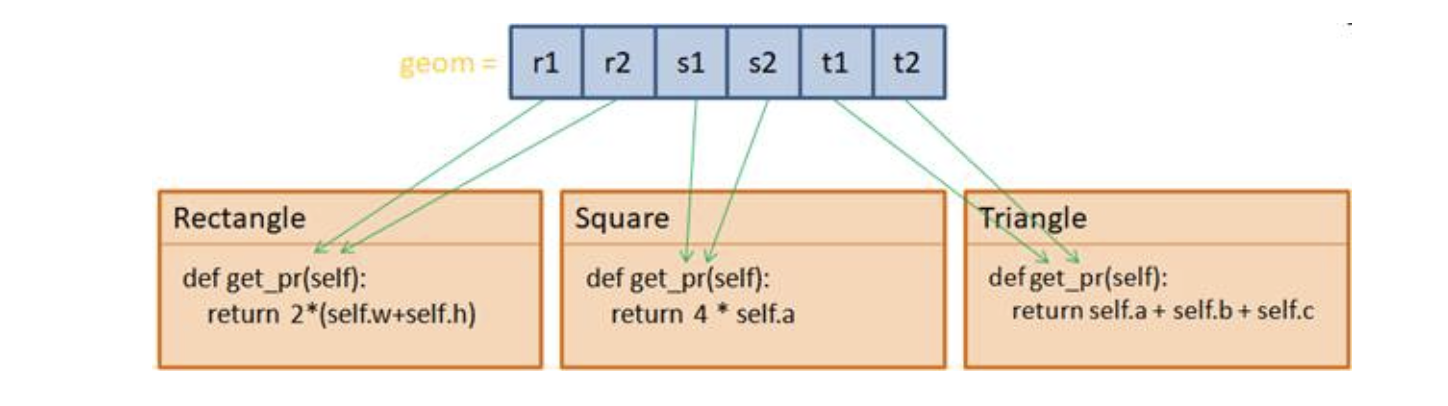

И это логично, так как каждая ссылка списка ведет на соответствующий объект класса и далее через нее происходит прямой вызов метода get_pr(). Это и есть пример полиморфизма, когда к разным объектам мы обращаемся через индекс единого списка geom (единый интерфейс), а затем, вызываем геттер get_pr() соответствующего объекта.

In [107]:
class Rectangle:
    def __init__(self, w, h):
        self.w = w
        self.h = h
 
    def get_pr(self):
        return 2*(self.w+self.h)
 
 
class Square:
    def __init__(self, a):
        self.a = a
 
    def get_pr(self):
        return 4*self.a
    
geom = [Rectangle(1, 2), Rectangle(3, 4),
        Square(10), Square(20)]

for g in geom:
    print(g.get_pr())

6
14
40
80



## Абстрактные методы

Методы, которые обязательно нужно переопределять в дочерних классах и которые не имеют своей собственной реализации называют абстрактными.

Но у нашей реализации есть один существенный недостаток. Что если мы забудем в каком-либо классе определить метод get_pr(), например, в Triangle. Тогда, очевидно, программа приведет к ошибке. Как можно было бы этого избежать? Один из вариантов определить базовый класс для классов геометрических примитивов и в нем прописать реализацию геттера get_pr(), используемую по умолчанию, например, так:
```
class Geom:
    def get_pr(self):
        return -1
```
А все остальные классы унаследовать от него:
```
class Rectangle(Geom):
...
 
 
class Square(Geom):
...
 
 
class Triangle(Geom):
...
```
Теперь, после запуска программы, для треугольников будем получать значения -1. (Предподагаем, что в классе triangle не переопределен метод get_ptr и он просто вызывается из базового класса)

Но и это не самое лучшее решение. Все же, нам бы хотелось, чтобы каждый дочерний класс имел бы обязательную реализацию метода get_pr(). Для этого в геттере get_pr() мы будем генерировать специальное исключение NotImplementedError, следующим образом:
```
class Geom:
    def get_pr(self):
        raise NotImplementedError("В дочернем классе должен быть переопределен метод get_pr()")
```

И если в каком-либо дочернем классе не будет определен метод get_pr(), то вызовется метод базового класса и выдаст ошибку NotImplementedError, которая будет сигнализировать о том, что метод не переопределен.

Запустим программу и действительно видим это сообщение при попытке вызвать get_pr() для объектов Triangle. Причем, видя ошибку NotImplementedError, мы понимаем, что она связана именно с необходимостью  переопределения get_pr(), а не с чем-то другим. В этом плюс такого подхода.

В языках программирования методы, которые обязательно нужно переопределять в дочерних классах и которые не имеют своей собственной реализации называют абстрактными. Конечно, в языке Python нет чисто абстрактных методов. Здесь мы лишь выполнили имитацию их поведения, заставляя программиста определять геттер get_pr() в дочерних классах, самостоятельно генерируя исключение NotImplementedError.

Another example

In [119]:
from pathlib import Path
class AudioFile:
    ext: str
 
    def __init__(self, filepath: Path) -> None:
            if not filepath.suffix == self.ext:
                raise ValueError("Invalid file format")
            self.filepath = filepath
class MP3File(AudioFile):
    ext = ".mp3"
    def play(self) -> None:
        print(f"playing {self.filepath} as mp3")
class WavFile(AudioFile):
    ext = ".wav"
    def play(self) -> None:
        print(f"playing {self.filepath} as wav")
class OggFile(AudioFile):
    ext = ".ogg"
    def play(self) -> None:
        print(f"playing {self.filepath} as ogg")

In [122]:
p_1 = MP3File(Path("Heart of the Sunrise.mp3"))
p_1.play()
p_2 = WavFile(Path("Roundabout.wav"))
p_2.play()

playing Heart of the Sunrise.mp3 as mp3
playing Roundabout.wav as wav


In [121]:
p_1 = MP3File(Path("Heart of the Sunrise.mp2"))
p_1.play()

ValueError: Invalid file format


# 6 Множественное наследование

Mixin классы - это концепция в программировании, в которой класс предоставляет функциональные возможности, но не предназначен для самостоятельного использования. Основная цель миксинов - предоставить какие-то дополнительные методы. Используется для «добавления» дополнительных свойств и методов в класс.
Класс миксина не предназначен для использования отдельно. Он предоставляет новые методы или переопределяет имеющиеся методы.

В языке Python допускается множественное наследование, когда один дочерний класс образуется сразу от нескольких базовых, согласно синтаксису:
```
class A(base1, base2, …, baseN): 
…
```
Давайте посмотрим, как это работает и для чего вообще нужно. Множественного наследование применяется не так часто, как обычное наследование от одного класса. Но, тем не менее это тоже важный механизм и некоторые подходы к программированию его активно используют. Например, идея миксинов (mixins) в Python реализуется через множественное наследование. И учебный пример я решил связать именно с ними, а заодно показать еще один прием в программировании.

Давайте представим, что мы делаем интернет-магазин по продаже товаров, например, ноутбуков, дисков, процессоров и т.п. Каждый товар будет определяться своим классом, а общим (базовым) для них всех будет класс Goods – товары. Также у каждого товара обязательно будут поля:

* name – наименование
* weight – вес
* price – цена
Для примера запишем в нашей программе базовый класс Goods:
```
class Goods:
    def __init__(self, name, weight, price):
        print("init MixinLog")
        self.name = name
        self.weight = weight
        self.price = price
 
    def print_info(self):
        print(f"{self.name}, {self.weight}, {self.price}")
```
И один дочерний класс для ноутбуков:
```
class NoteBook(Goods):
    pass
```
Затем, мы можем создать объект для ноутбука:
```
n = NoteBook("Acer", 1.5, 30000)
```
и распечатать информацию о нем:
```
n.print_info()
```

In [123]:
class Goods:
    def __init__(self, name, weight, price):
        print("init MixinLog")
        self.name = name
        self.weight = weight
        self.price = price
 
    def print_info(self):
        print(f"{self.name}, {self.weight}, {self.price}")

class NoteBook(Goods):
    pass

n = NoteBook("Acer", 1.5, 30000)
n.print_info()

init MixinLog
Acer, 1.5, 30000


Пока ничего нового здесь нет. Но потом, к нам подходит тимлид и говорит:

- Дорогой сеньор, добавь, пожалуйста, возможность логирования товаров магазина.

Логированием называют запись логов. Оно позволяет ответить на вопросы, что происходило, когда и при каких обстоятельствах.

И как бы вы поступили на месте этого сеньора? Плохой сеньор начнет прописывать логику логирования либо непосредственно в базовом классе Goods, либо уровнем выше (в иерархии наследования). А хороший воспользуется идеей миксинов. Для этого он создаст еще один класс, который можно назвать:
```
class MixinLog:
    ID = 0
 
    def __init__(self):
        print("init MixinLog")
        self.ID += 1
        self.id = self.ID
 
    def save_sell_log(self):
        print(f"{self.id}: товар продан в 00:00 часов")
```
Этот класс работает совершенно независимо от классов Goods и Notebook и лишь добавляет функционал по логированию товаров с использованием их id. Такие независимые базовые классы и получили название миксинов – примесей.

Добавим этот класс в цепочку наследования:
```
class NoteBook(Goods, MixinLog):
    pass
```
а ниже вызовем метод save_sell_log():
```
n.save_sell_log()
```

In [136]:
class MixinLog:
    ID = 0
 
    def __init__(self):
        print("init MixinLog")
        self.__class__.ID+=1 # MixinLog.ID += 1
        #self.ID += 1
        self.id = self.ID
 
    def save_sell_log(self):
        print(f"{self.id}: товар продан в 00:00 часов")

class Goods:
    def __init__(self, name, weight, price):
        print("init Goods")
        self.name = name
        self.weight = weight
        self.price = price
 
    def print_info(self):
        print(f"{self.name}, {self.weight}, {self.price}")

class NoteBook(Goods, MixinLog):
    pass

n = NoteBook("Acer", 1.5, 30000)
n.print_info()
n.save_sell_log()

init Goods
Acer, 1.5, 30000


AttributeError: 'NoteBook' object has no attribute 'id'

И видим ошибку. Очевидно, она связана с тем, что у второго класса MixinLog не был вызван инициализатор. Почему так произошло? Как мы уже знаем, при создании объектов инициализатор ищется сначала в дочернем классе, но так как его там нет, то в первом базовом Goods. Он там есть, выполняется и на этом инициализация нашего объекта NoteBook завершается. Однако, нам нужно также взывать инициализатор и второго базового класса MixinLog. В данном случае, сделать это можно с помощью объекта-посредника super(), которая и делегирует вызов метода __init__ класса MixinLog:
```
class Goods:
    def __init__(self, name, weight, price):
        super().__init__()
        print("init Goods")
        self.name = name
        self.weight = weight
        self.price = price
…
```
Теперь, после запуска программы, мы видим, что оба инициализатора сработали и ошибок никаких нет.

In [143]:
class MixinLog:
    ID = 0
 
    def __init__(self):
        print("init MixinLog")
        self.__class__.ID+=1 # MixinLog.ID += 1
        #self.ID += 1
        self.id = self.ID
 
    def save_sell_log(self):
        print(f"{self.id}: товар продан в 00:00 часов")

class Goods:
    def __init__(self, name, weight, price):
        super().__init__()
        print("init Goods")
        self.name = name
        self.weight = weight
        self.price = price
 
    def print_info(self):
        print(f"{self.name}, {self.weight}, {self.price}")

class NoteBook(Goods, MixinLog):
    pass

n = NoteBook("Acer", 1.5, 30000)
n.print_info()
n.save_sell_log()
print(n.__dict__)

init MixinLog
init Goods
Acer, 1.5, 30000
1: товар продан в 00:00 часов
{'ID': 1, 'id': 1, 'name': 'Acer', 'weight': 1.5, 'price': 30000}


Но откуда функция super() «знает», что нужно обратиться ко второму базовому классу MixinLog, а, скажем, не к базовому классу object, от которого неявно наследуются все классы верхнего уровня? В Python существует специальный алгоритм обхода базовых классов при множественном наследовании. Сокращенно, он называется:
```
MRO – Method Resolution Order
```
И говорит, в каком порядке обходить базовые классы:

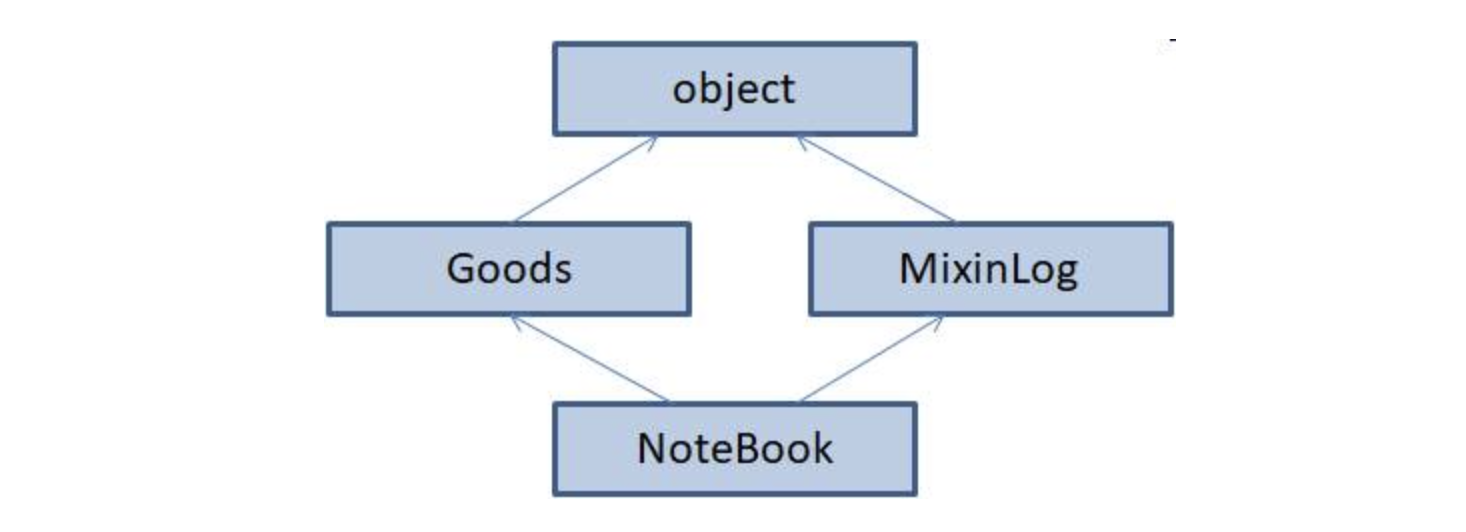

Мы можем увидеть эту цепочку обхода базовых классов, если распечатать специальную коллекцию __mro__ любого класса:

In [144]:
print(NoteBook.__mro__)

(<class '__main__.NoteBook'>, <class '__main__.Goods'>, <class '__main__.MixinLog'>, <class 'object'>)


В консоли появится следующая последовательность:
```
(<class '__main__.NoteBook'>, <class '__main__.Goods'>, <class '__main__.MixinLog'>, <class 'object'>)
```
То есть, методы сначала ищутся в самом классе NoteBook, затем, в классе Goods, далее идет класс MixinLog и от него уже идет к классу object. Это цепочка обхода для нашего конкретного примера. При другой иерархии наследования эта цепочка может быть другой, но одно всегда неизменно –первый базовый класс, указанный при наследовании, выбирается первым (после дочернего, разумеется). И это важный момент. Вы всегда можете быть уверены, что инициализатор первого базового класса сработает в первую очередь. Почему это важно? Смотрите, при создании объекта NoteBook мы передаем ему три аргумента. Эти три аргумента, затем, передаются в инициализатор. И так как первым будет вызван инициализатор класса Goods, то мы уверены, что эти аргументы будут переданы именно в него, а не в какой-то другой инициализатор других базовых классов. И какая бы цепочка наследования у нас ни была, все равно первым будет вызываться метод __init__ класса Goods, потому что он записан первым. Это гарантирует работоспособность нашей программы при разных иерархиях множественного наследования.

Ради интереса, давайте поменяем местами базовые классы:
```
class NoteBook(MixinLog, Goods):
    pass
```
И мы сразу получаем ошибку, что в метод __init__ передаются четыре аргумента, а он принимает только один, так как здесь отрабатывает инициализатор уже класса MixinLog. Так что порядок следования базовых классов при множественном наследовании имеет важное значение. Первым должен идти «основной» класс и у него, как правило, инициализатор имеет несколько параметров. А далее, записываются классы, у которых, опять же, как правило, инициализаторы имеют только параметр self. Это второй важный момент. Когда мы собираемся использовать множественное наследование, то структуру классов следует продумывать так, чтобы инициализаторы вспомогательных классов имели только один параметр self, иначе будут сложности их использования. В чем они состоят?

Давайте для примера пропишем в инициализаторе класса MixinLog один параметр p1
```
class MixinLog:
    def __init__(self, p1):
        super().__init__(1, 2)
        …
```
И объявим еще один класс миксинов, где в инициализаторе два параметра:
```
class MixinLog2:
    def __init__(self, p1, p2):
        super().__init__()
        print("init MixinLog 2")
```
В каждом методе __init__ мы также делаем делегированный вызов инициализатора следующего базового класса. А цепочка наследования будет такой:
```
class NoteBook(Goods, MixinLog, MixinLog2):
    pass
```
Сейчас при запуске у нас не возникает никаких ошибок, так как последовательность MRO имеет вид:
```
(<class '__main__.NoteBook'>, <class '__main__.Goods'>, <class '__main__.MixinLog'>, <class '__main__.MixinLog2'>, <class 'object'>)
```
То есть, мы знаем, что функция super() в классе Goods вызовет метод __init__ класса MixinLog с одним дополнительным параметром, а затем, метод __init__ класса MixinLog2 с двумя дополнительными параметрами. И мы «жестко» это прописали. Но, как вы понимаете, если хотя бы немного изменится цепочка наследования, например, так:
```
class NoteBook(Goods, MixinLog2, MixinLog):
    pass
```
то все нарушится и получим ошибки. Чтобы в программах при множественном наследовании не возникало проблем с зависимостью последовательности наследования дополнительных базовых классов, их инициализаторы следует создавать с одним параметром self и в каждом из них прописывать делегированный вызов инициализатора следующего класса командой:
```
super().__init__()
```
Тогда точно никаких особых проблем при использовании множественного наследования не возникнет.


Последнее, что я хочу отметить в этой теме, это вызов методов с одинаковыми именами из базовых классов. Давайте предположим, что в классе MixinLog имеется метод print_info с тем же именем, что и в классе Goods:
```
    def print_info(self):
        print("print_info класса MixinLog")
```
Понятно, что если сейчас его вызвать через объект класса NoteBook:
```
n.print_info()
```
то мы обратимся к методу класса Goods, так как он записан первым в цепочке наследования и в соответствии с алгоритмом обхода MRO он будет найден первым. Но что если мы хотим вызвать этот метод из второго базового класса MixinLog? Как поступить? Сделать это можно двумя способами. Либо напрямую вызвать этот метод через класс MixinLog:
```
MixinLog.print_info(n)
```
Обратите внимание, что в этом случае нам обязательно нужно указать первым аргументом ссылку на объект класса NoteBook. Либо, определить какой-либо метод в классе NoteBook (пусть он называется также):
```
class NoteBook(Goods, MixinLog):
    def print_info(self):
        MixinLog.print_info(self)
```
И тогда будет вызываться метод именно второго базового класса MixinLog.

Обычно, если нужно делать такие подмены, то есть, из конкретного дочернего класса вызывать метод другого (не первого) базового класса, то создают метод в дочернем классе с тем же именем, а затем, явно указывают нужный базовый класс.

Вот так работает множественное наследование в языке Python.

In [147]:
class MixinLog:
    ID = 0
 
    def __init__(self):
        print("init MixinLog")
        self.__class__.ID+=1 # MixinLog.ID += 1
        #self.ID += 1
        self.id = self.ID
 
    def save_sell_log(self):
        print(f"{self.id}: товар продан в 00:00 часов")

    def print_info(self):
        print("I'm in MixinLog")
        print("print_info класса MixinLog")

class Goods:
    def __init__(self, name, weight, price):
        super().__init__()
        print("init Goods")
        self.name = name
        self.weight = weight
        self.price = price
 
    def print_info(self):
        print("I'm in Goods")
        print(f"{self.name}, {self.weight}, {self.price}")

class NoteBook(Goods, MixinLog):
    pass

n = NoteBook("Acer", 1.5, 30000)
n.print_info() # то мы обратимся к методу класса Goods, так как он записан первым в цепочке наследования и в соответствии с алгоритмом обхода MRO он будет найден первым

init MixinLog
init Goods
I'm in Goods
Acer, 1.5, 30000


Но что если мы хотим вызвать этот метод из второго базового класса MixinLog? Как поступить? Сделать это можно двумя способами. Либо напрямую вызвать этот метод через класс MixinLog:

In [148]:
MixinLog.print_info(n)

I'm in MixinLog
print_info класса MixinLog


Обратите внимание, что в этом случае нам обязательно нужно указать первым аргументом ссылку на объект класса NoteBook. Либо, определить какой-либо метод в классе NoteBook (пусть он называется также):
```
class NoteBook(Goods, MixinLog):
    def print_info(self):
        MixinLog.print_info(self)
```
И тогда будет вызываться метод именно второго базового класса MixinLog.

# UML 
https://realpython.com/lessons/uml-diagrams/